In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn 
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score , mean_squared_error



In [145]:
data = pd.read_excel('C:\\Users\\kahza\\Desktop\\oil\\Data.xlsx' , sheet_name='Oil')
print('The number of data points : ',len(data))
data.head()

The number of data points :  41


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Gp Mscf,Np bbl,"Time, Month","Rate, bbl/m","Time, Day","Rate, bbl/d"
1,NaN,0,0,0,0,0,0
2,NaN,1452,2269,1,2269,30.416667,74.59726
3,NaN,2301,3304,2,1035,60.833333,34.027397
4,NaN,4751,6336,3,3032,91.25,99.682192


In [146]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [147]:
data.drop(columns=['Unnamed: 0','Unnamed: 5', 'Unnamed: 6'],inplace=True)
data.drop(index=[0,1],inplace=True)
print('The number of data points after removing unwanted data : ',len(data))
data.rename(columns={'Unnamed: 1':'Gp Mscf','Unnamed: 2':'Np bbl','Unnamed: 3':'Time Month','Unnamed: 4':'Rate bbl/m'},inplace=True)


The number of data points after removing unwanted data :  39


In [148]:
data.columns

Index(['Gp Mscf', 'Np bbl', 'Time Month', 'Rate bbl/m'], dtype='object')

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 2 to 40
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gp Mscf     39 non-null     object
 1   Np bbl      39 non-null     object
 2   Time Month  39 non-null     object
 3   Rate bbl/m  39 non-null     object
dtypes: object(4)
memory usage: 1.5+ KB


In [150]:
data['Gp Mscf'] = pd.to_numeric(data['Gp Mscf'])
data['Np bbl'] = pd.to_numeric(data['Np bbl'])
data['Rate bbl/m'] = pd.to_numeric(data['Rate bbl/m'])
data['Time Month'] = pd.to_numeric(data['Time Month'])

In [151]:
data.dtypes

Gp Mscf       int64
Np bbl        int64
Time Month    int64
Rate bbl/m    int64
dtype: object

In [152]:
data.isnull().sum()

Gp Mscf       0
Np bbl        0
Time Month    0
Rate bbl/m    0
dtype: int64

In [153]:
data.describe()

,Gp Mscf,Np bbl,Time Month,Rate bbl/m
count,39.000000,39.000000,39.000000,39.000000
mean,142523.512821,69215.589744,20.000000,2490.179487
std,75872.717052,27970.569231,11.401754,2558.474585
min,1452.000000,2269.000000,1.000000,307.000000
25%,83870.500000,57376.000000,10.500000,942.000000
50%,153617.000000,78720.000000,20.000000,1610.000000
75%,210247.500000,90959.000000,29.500000,2942.000000
max,243778.000000,97117.000000,39.000000,13180.000000


In [154]:
print('The maximum Np is :',max(data['Np bbl']))
print('The maximum Rate is :',max(data['Rate bbl/m']))

The maximum Np is : 97117
The maximum Rate is : 13180


<AxesSubplot:>

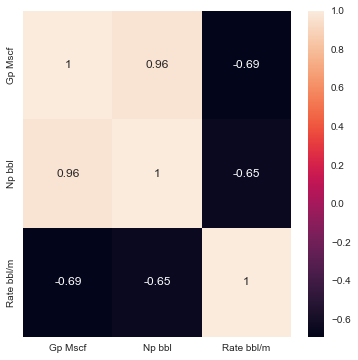

In [155]:
corr = data.drop(columns=['Time Month']).corr()
plt.figure(figsize=(6,6))
sb.heatmap(corr,cbar=True , annot=True)

In [156]:
corr.sort_values(by='Rate bbl/m',ascending=False).iloc[0].sort_values(ascending=False)

Rate bbl/m    1.000000
Np bbl       -0.647530
Gp Mscf      -0.689516
Name: Rate bbl/m, dtype: float64

<Figure size 800x800 with 0 Axes>

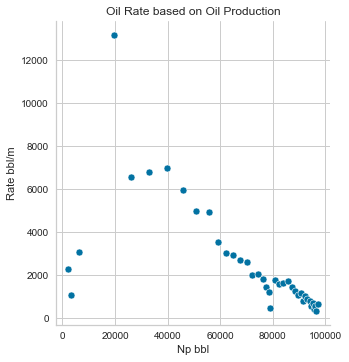

In [157]:
plt.figure(figsize=(10,10),dpi=80)
sb.relplot(x='Np bbl' , y='Rate bbl/m',data=data)
plt.title('Oil Rate based on Oil Production')
plt.show()

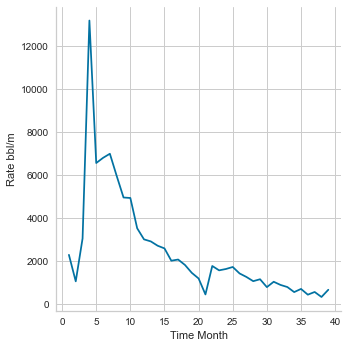

In [158]:
sb.relplot(x='Time Month',y='Rate bbl/m',data=data , kind='line')

<AxesSubplot:xlabel='Time Month', ylabel='Rate bbl/m'>

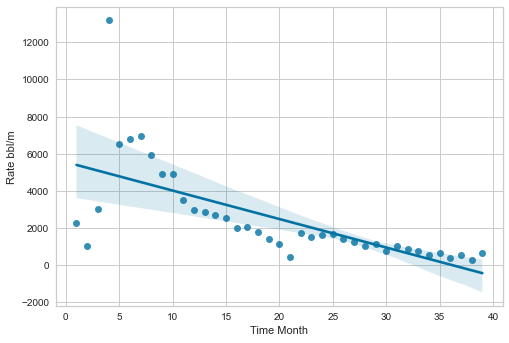

In [159]:
sb.regplot(x='Time Month',y='Rate bbl/m',data=data)

<Figure size 800x800 with 0 Axes>

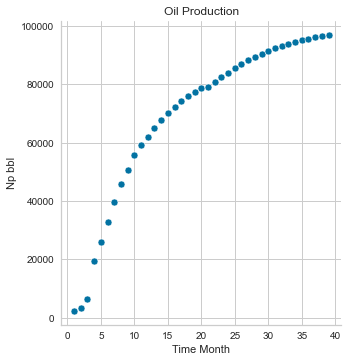

In [160]:
plt.figure(figsize=(10,10),dpi=80)
sb.relplot(x='Time Month' , y='Np bbl',data=data)
plt.title('Oil Production')
plt.show()

In [161]:
X = data.drop(columns=['Rate bbl/m']).values
Y = data['Rate bbl/m'].values

In [162]:
D_Matrix = xgb.DMatrix(X,label=Y)
D_Matrix

In [163]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.25 , random_state=42)

In [164]:
print('X_train data shape ',X_train.shape)
print('X_test data shape ',X_test.shape)
print('Y_train data shape ',Y_train.shape)
print('Y_test data shape ',Y_test.shape)

X_train data shape  (29, 3)
X_test data shape  (10, 3)
Y_train data shape  (29,)
Y_test data shape  (10,)


In [165]:
Regressor =xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=342, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0 )
Regressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=342, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0)

In [166]:
Cross_scores = cross_val_score(estimator=Regressor , X = X_train , y = Y_train ,cv=10)
print('Mean accuracy of cross validation for the model is about {:.2f} %'.format(Cross_scores.mean()*100))

Mean accuracy of cross validation for the model is about 8.27 %


In [167]:
Prediction = Regressor.predict(X_test)
RMSE = np.sqrt(mean_squared_error(Y_test , Prediction))
r2score = r2_score(Y_test , Prediction)
print('Root mean square error : {:.2f} %'.format(RMSE))
print('r2_score : {:.2f} %'.format((r2score)*100))

Root mean square error : 378.03 %
r2_score : 97.19 %


Diffrences between Actual and Predicted data


<function matplotlib.pyplot.show(close=None, block=None)>

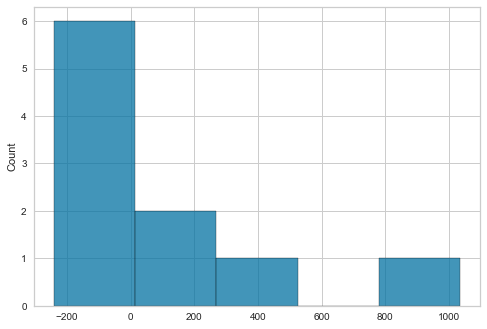

In [168]:
print('Diffrences between Actual and Predicted data')
sb.histplot(Y_test-Prediction)
plt.show

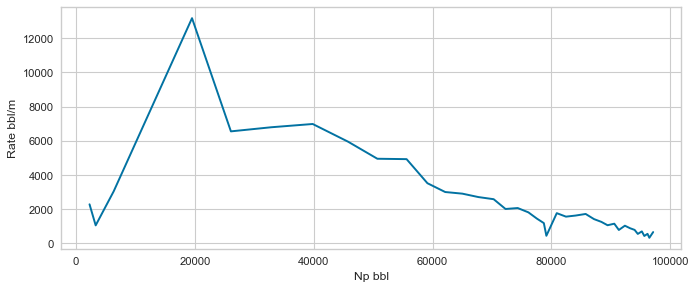

In [169]:
plt.figure(figsize=(10,4),dpi=80)
sb.lineplot(x='Np bbl' , y='Rate bbl/m'  ,data=data)
plt.show()

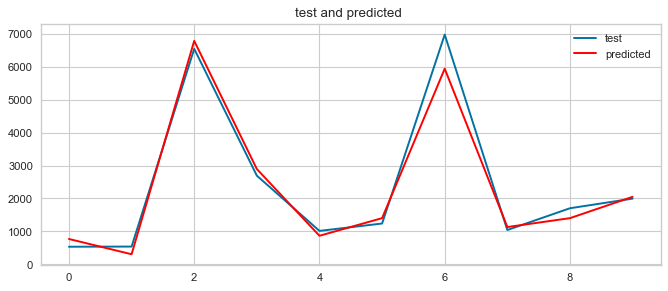

In [170]:
plt.figure(figsize=(10,4) , dpi=80)
x_ax = range(len(Y_test))
plt.plot(x_ax , Y_test  , label = 'Actual')
plt.plot(x_ax , Prediction , color='red' , label='Predicted')
plt.title('Actual and Predicted ')
plt.legend()
plt.show()